In [1]:
import multiplewatermark
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
# from tqdm import tqdm

In [ ]:
importlib.reload(multiplewatermark)

In [ ]:
importlib.reload(multiplewatermark)

outsideShape = (40, 40)
factor = 20
bitPerPart = 8
radius = 10

imageData = multiplewatermark.readImage("test-2000x2000.png")
preCalcFragileWatermark = multiplewatermark.processEmbedFragileWatermarkColor(
    imageData=imageData, password="thor", outsideImageSize=outsideShape)
watermarked = multiplewatermark.processEmbedMultipleWatermarkColor(
    imageData=imageData, password="thor", outsideImageSize=outsideShape, factor=factor, show=False, save=False, dir="watermarked", out="watermarked.png", bitPerPart=bitPerPart, radius=radius, preCalcFragileWatermark=preCalcFragileWatermark, mode="NORMAL")
watermarked = multiplewatermark.processEmbedMultipleWatermarkColor(
    imageData=imageData, password="thor", outsideImageSize=outsideShape, factor=factor, show=False, save=False, dir="watermarked", out="watermarked.png", bitPerPart=bitPerPart, radius=radius, preCalcFragileWatermark=preCalcFragileWatermark, mode="NORMAL")
multiplewatermark.processExtractMultipleWatermarkColor(watermarked, imageData, "thor", outsideShape, factor, bitPerPart, radius)


In [ ]:
SEPARATOR = "-"


def isSkip(outsideShape, radius):
    if (radius*2 >= min(outsideShape)):
        return True
    return False


def createFileName(outsideShape, factor, bitPerPart, radius):
    return str(outsideShape[0]) + SEPARATOR + str(outsideShape[1]) + SEPARATOR + str(factor) + \
        SEPARATOR + str(bitPerPart) + SEPARATOR + str(radius) + ".png"


In [ ]:
outsideShapeList = [(10, 10), (20, 20), (40, 40), (50, 50),
                    (100, 100), (200, 200), (250, 250), (500, 500)]
factorList = [1] + [i for i in range(10, 101, 10)]
bitPerPartList = [4, 8, 16, 32, 64, 128]

filenameDF = []
outsideShapeDF = []
factorDF = []
bitPerPartDf = []
radiusDF = []
psnrDF = []

pbar_outsideShape = tqdm(total=len(outsideShapeList), desc="outside shape", position=0)
pbar_radius = tqdm(desc="radius", position=1)
pbar_factor = tqdm(total=len(factorList), desc="factor", position=2)
pbar_bitPerPart = tqdm(total=len(bitPerPartList), desc="bit per part", position=3)

imageData = multiplewatermark.readImage("test-2000x2000.png")
for outsideShape in outsideShapeList:
    pbar_outsideShape.set_description(desc="outside shape " + str(outsideShape))
    step = min(outsideShape) // 10
    if step < 1:
        step = 1
    radiusList = [i for i in range(1, (min(outsideShape) // 2) - 2, step)]
    preCalcFragileWatermark = multiplewatermark.processEmbedFragileWatermarkColor(
        imageData=imageData, password="thor", outsideImageSize=outsideShape)
    pbar_radius.reset(total=len(radiusList))
    for radius in radiusList:
        pbar_radius.set_description(desc="radius " + str(radius))
        if (isSkip(outsideShape=outsideShape, radius=radius)):
            continue
        pbar_factor.reset()
        for factor in factorList:
            pbar_factor.set_description(desc="factor " + str(factor))
            pbar_bitPerPart.reset()
            for bitPerPart in bitPerPartList:
                pbar_bitPerPart.set_description(desc="bit per part " + str(bitPerPart))
                filename = createFileName(
                    outsideShape, factor, bitPerPart, radius)
                watermarked = multiplewatermark.processEmbedMultipleWatermarkColor(
                    imageData=imageData, password="thor", outsideImageSize=outsideShape, factor=factor, show=False, save=True, dir="watermarked/test-2000x2000", out=filename, bitPerPart=bitPerPart, radius=radius, mode="NORMAL", preCalcFragileWatermark=preCalcFragileWatermark)
                psnr = multiplewatermark.psnr(imageData, watermarked)
                outsideShapeDF.append(outsideShape)
                factorDF.append(factor)
                bitPerPartDf.append(bitPerPart)
                radiusDF.append(radius)
                psnrDF.append(psnr)
                filenameDF.append(filename)
                pbar_bitPerPart.update()
            pbar_factor.update()
        pbar_radius.update()
    pbar_outsideShape.update()

pbar_outsideShape.close
pbar_radius.close()
pbar_factor.close()
pbar_bitPerPart.close()


dict = {
    "filename": filenameDF,
    "outsideShape": outsideShapeDF,
    "factor": factorDF,
    "bitPerPart": bitPerPartDf,
    "radius": radiusDF,
    "psnr": psnrDF
}
df = pd.DataFrame(dict)
df.to_csv("2000x2000.csv")
print(df)


In [ ]:
outsideShapeList = [(10, 10), (20, 20), (40, 40), (50, 50),
                    (100, 100), (200, 200), (250, 250)]
factorList = [1] + [i for i in range(10, 101, 10)]
bitPerPartList = [4, 8, 16, 32, 64]

filenameDF = []
outsideShapeDF = []
factorDF = []
bitPerPartDf = []
radiusDF = []
psnrDF = []

pbar_outsideShape = tqdm(total=len(outsideShapeList), desc="outside shape", position=0)
pbar_radius = tqdm(desc="radius", position=1)
pbar_factor = tqdm(total=len(factorList), desc="factor", position=2)
pbar_bitPerPart = tqdm(total=len(bitPerPartList), desc="bit per part", position=3)

imageData = multiplewatermark.readImage("test-1000x1000.png")
for outsideShape in outsideShapeList:
    pbar_outsideShape.set_description(desc="outside shape " + str(outsideShape))
    step = min(outsideShape) // 10
    if step < 1:
        step = 1
    radiusList = [i for i in range(1, (min(outsideShape) // 2) - 2, step)]
    preCalcFragileWatermark = multiplewatermark.processEmbedFragileWatermarkColor(
        imageData=imageData, password="thor", outsideImageSize=outsideShape)
    pbar_radius.reset(total=len(radiusList))
    for radius in radiusList:
        pbar_radius.set_description(desc="radius " + str(radius))
        if (isSkip(outsideShape=outsideShape, radius=radius)):
            continue
        pbar_factor.reset()
        for factor in factorList:
            pbar_factor.set_description(desc="factor " + str(factor))
            pbar_bitPerPart.reset()
            for bitPerPart in bitPerPartList:
                pbar_bitPerPart.set_description(desc="bit per part " + str(bitPerPart))
                filename = createFileName(
                    outsideShape, factor, bitPerPart, radius)
                watermarked = multiplewatermark.processEmbedMultipleWatermarkColor(
                    imageData=imageData, password="thor", outsideImageSize=outsideShape, factor=factor, show=False, save=True, dir="watermarked/test-1000x1000", out=filename, bitPerPart=bitPerPart, radius=radius, mode="NORMAL", preCalcFragileWatermark=preCalcFragileWatermark)
                psnr = multiplewatermark.psnr(imageData, watermarked)
                outsideShapeDF.append(outsideShape)
                factorDF.append(factor)
                bitPerPartDf.append(bitPerPart)
                radiusDF.append(radius)
                psnrDF.append(psnr)
                filenameDF.append(filename)
                pbar_bitPerPart.update()
            pbar_factor.update()
        pbar_radius.update()
    pbar_outsideShape.update()

pbar_outsideShape.close
pbar_radius.close()
pbar_factor.close()
pbar_bitPerPart.close()


dict = {
    "filename": filenameDF,
    "outsideShape": outsideShapeDF,
    "factor": factorDF,
    "bitPerPart": bitPerPartDf,
    "radius": radiusDF,
    "psnr": psnrDF
}
df = pd.DataFrame(dict)
df.to_csv("1000x1000.csv")
print(df)


In [ ]:
outsideShapeList = [(10, 10), (20, 20), (50, 50),
                    (100, 100)]
factorList = [1] + [i for i in range(10, 101, 10)]
bitPerPartList = [4, 8, 16, 32]

filenameDF = []
outsideShapeDF = []
factorDF = []
bitPerPartDf = []
radiusDF = []
psnrDF = []

pbar_outsideShape = tqdm(total=len(outsideShapeList), desc="outside shape", position=0)
pbar_radius = tqdm(desc="radius", position=1)
pbar_factor = tqdm(total=len(factorList), desc="factor", position=2)
pbar_bitPerPart = tqdm(total=len(bitPerPartList), desc="bit per part", position=3)

imageData = multiplewatermark.readImage("test-500x500.png")
for outsideShape in outsideShapeList:
    pbar_outsideShape.set_description(desc="outside shape " + str(outsideShape))
    step = min(outsideShape) // 10
    if step < 1:
        step = 1
    radiusList = [i for i in range(1, (min(outsideShape) // 2) - 2, step)]
    preCalcFragileWatermark = multiplewatermark.processEmbedFragileWatermarkColor(
        imageData=imageData, password="thor", outsideImageSize=outsideShape)
    pbar_radius.reset(total=len(radiusList))
    for radius in radiusList:
        pbar_radius.set_description(desc="radius " + str(radius))
        if (isSkip(outsideShape=outsideShape, radius=radius)):
            continue
        pbar_factor.reset()
        for factor in factorList:
            pbar_factor.set_description(desc="factor " + str(factor))
            pbar_bitPerPart.reset()
            for bitPerPart in bitPerPartList:
                pbar_bitPerPart.set_description(desc="bit per part " + str(bitPerPart))
                filename = createFileName(
                    outsideShape, factor, bitPerPart, radius)
                watermarked = multiplewatermark.processEmbedMultipleWatermarkColor(
                    imageData=imageData, password="thor", outsideImageSize=outsideShape, factor=factor, show=False, save=True, dir="watermarked/test-500x500", out=filename, bitPerPart=bitPerPart, radius=radius, mode="NORMAL", preCalcFragileWatermark=preCalcFragileWatermark)
                psnr = multiplewatermark.psnr(imageData, watermarked)
                outsideShapeDF.append(outsideShape)
                factorDF.append(factor)
                bitPerPartDf.append(bitPerPart)
                radiusDF.append(radius)
                psnrDF.append(psnr)
                filenameDF.append(filename)
                pbar_bitPerPart.update()
            pbar_factor.update()
        pbar_radius.update()
    pbar_outsideShape.update()

pbar_outsideShape.close
pbar_radius.close()
pbar_factor.close()
pbar_bitPerPart.close()


dict = {
    "filename": filenameDF,
    "outsideShape": outsideShapeDF,
    "factor": factorDF,
    "bitPerPart": bitPerPartDf,
    "radius": radiusDF,
    "psnr": psnrDF
}
df = pd.DataFrame(dict)
df.to_csv("500x500.csv")
print(df)


In [3]:
df = pd.read_csv("500x500-1.csv", index_col=0)
originalImageData = multiplewatermark.readImage("test-500x500.png")
imageData = multiplewatermark.readImage(
    "watermarked/test-500x500/" + df.loc[0]["filename"])
originalImageDataYUV = multiplewatermark.rgbToYUV(originalImageData)
imageDataYUV = multiplewatermark.rgbToYUV(imageData)

outsideImageSize = tuple(map(int, df.loc[0]["outsideShape"][1:-1].split(', ')))
factor = int(df.loc[0]["factor"])
bitPerPart = int(df.loc[0]["bitPerPart"])
radius = int(df.loc[0]["radius"])

_, outsideImageDataY = multiplewatermark.splitImage(
    imageDataYUV[:, :, 0], outsideImageSize)
_, originalOutsideImageDataY = multiplewatermark.splitImage(
    originalImageDataYUV[:, :, 0], outsideImageSize)

robustCheckResult = multiplewatermark.processExtractRobustWatermark(
    outsideImageDataY, originalOutsideImageDataY, "thor", factor, bitPerPart, radius)

print(outsideImageSize)
print(factor)
print(bitPerPart)
print(radius)
print(robustCheckResult)
print(df.loc[0])


(10, 10)
1
4
1
0.7512755102040817
filename        10-10-1-4-1.png
outsideShape           (10, 10)
factor                        1
bitPerPart                    4
radius                        1
psnr                  41.568959
Name: 0, dtype: object


In [7]:
df = pd.read_csv("500x500-1.csv", index_col=0)
originalImageData = multiplewatermark.readImage("test-500x500.png")
originalImageDataYUV = multiplewatermark.rgbToYUV(originalImageData)
robust = []
fragileR = []
fragileG = []
fragileB = []

prevImageSize = (-1, -1)
for i, data in tqdm(df.iterrows(), total=df.shape[0]):
    imageData = multiplewatermark.readImage(
        "watermarked/test-500x500/" + data["filename"])
    
    imageDataYUV = multiplewatermark.rgbToYUV(imageData)
    outsideImageSize = tuple(
        map(int, data["outsideShape"][1:-1].split(', ')))
    factor = int(data["factor"])
    bitPerPart = int(data["bitPerPart"])
    radius = int(data["radius"])

    _, originalOutsideImageDataY = multiplewatermark.splitImage(
        originalImageDataYUV[:, :, 0], outsideImageSize)
    _, outsideImageDataY = multiplewatermark.splitImage(
        imageDataYUV[:, :, 0], outsideImageSize)

    robustCheckResult = multiplewatermark.processExtractRobustWatermark(
        outsideImageDataY, originalOutsideImageDataY, "thor", factor, bitPerPart, radius)
    
    # if(prevImageSize != outsideImageSize):
    if(True):
        # print("running fragile check")
        insideImageDataR, _ = multiplewatermark.splitImage(
            imageData[:, :, 0], outsideImageSize, multiplewatermark.INSIDE_ONLY)
        insideImageDataG, _ = multiplewatermark.splitImage(
            imageData[:, :, 1], outsideImageSize, multiplewatermark.INSIDE_ONLY)
        insideImageDataB, _ = multiplewatermark.splitImage(
            imageData[:, :, 2], outsideImageSize, multiplewatermark.INSIDE_ONLY)
        extractedFragileR = multiplewatermark.extractFragileWatermark(insideImageDataR, "thor")
        extractedFragileG = multiplewatermark.extractFragileWatermark(insideImageDataG, "thor")
        extractedFragileB = multiplewatermark.extractFragileWatermark(insideImageDataB, "thor")
        prevImageSize = outsideImageSize
    
    robust.append(robustCheckResult)
    fragileR.append(np.average(extractedFragileR))
    fragileG.append(np.average(extractedFragileG))
    fragileB.append(np.average(extractedFragileB))

df["robustCheck"] = robust
df["fragileRedCheck"] = fragileR
df["fragileGreenCheck"] = fragileG
df["fragileBlueCheck"] = fragileB
df.to_csv("500x500-with-check.csv")


  0%|          | 0/704 [00:00<?, ?it/s]

running fragile check
running fragile check
running fragile check
running fragile check


In [3]:
print((1, 1) == (1, 1))

True


In [8]:
df = pd.read_csv("1000x1000-1.csv", index_col=0)
originalImageData = multiplewatermark.readImage("test-1000x1000.png")
originalImageDataYUV = multiplewatermark.rgbToYUV(originalImageData)
robust = []
fragileR = []
fragileG = []
fragileB = []

prevImageSize = (-1, -1)
for i, data in tqdm(df.iterrows(), total=df.shape[0]):
    imageData = multiplewatermark.readImage(
        "watermarked/test-1000x1000/" + data["filename"])
    
    imageDataYUV = multiplewatermark.rgbToYUV(imageData)
    outsideImageSize = tuple(
        map(int, data["outsideShape"][1:-1].split(', ')))
    factor = int(data["factor"])
    bitPerPart = int(data["bitPerPart"])
    radius = int(data["radius"])

    _, originalOutsideImageDataY = multiplewatermark.splitImage(
        originalImageDataYUV[:, :, 0], outsideImageSize)
    _, outsideImageDataY = multiplewatermark.splitImage(
        imageDataYUV[:, :, 0], outsideImageSize)

    robustCheckResult = multiplewatermark.processExtractRobustWatermark(
        outsideImageDataY, originalOutsideImageDataY, "thor", factor, bitPerPart, radius)
    
    if(prevImageSize != outsideImageSize):
    # if(True):
        print("running fragile check")
        insideImageDataR, _ = multiplewatermark.splitImage(
            imageData[:, :, 0], outsideImageSize, multiplewatermark.INSIDE_ONLY)
        insideImageDataG, _ = multiplewatermark.splitImage(
            imageData[:, :, 1], outsideImageSize, multiplewatermark.INSIDE_ONLY)
        insideImageDataB, _ = multiplewatermark.splitImage(
            imageData[:, :, 2], outsideImageSize, multiplewatermark.INSIDE_ONLY)
        extractedFragileR = multiplewatermark.extractFragileWatermark(insideImageDataR, "thor")
        extractedFragileG = multiplewatermark.extractFragileWatermark(insideImageDataG, "thor")
        extractedFragileB = multiplewatermark.extractFragileWatermark(insideImageDataB, "thor")
        prevImageSize = outsideImageSize
    
    robust.append(robustCheckResult)
    fragileR.append(np.average(extractedFragileR))
    fragileG.append(np.average(extractedFragileG))
    fragileB.append(np.average(extractedFragileB))

df["robustCheck"] = robust
df["fragileRedCheck"] = fragileR
df["fragileGreenCheck"] = fragileG
df["fragileBlueCheck"] = fragileB
df.to_csv("1000x1000-with-check.csv")


  0%|          | 0/1705 [00:00<?, ?it/s]

running fragile check
running fragile check
running fragile check
running fragile check
running fragile check
running fragile check
running fragile check


In [10]:
df = pd.read_csv("2000x2000-1.csv", index_col=0)
originalImageData = multiplewatermark.readImage("test-2000x2000.png")
originalImageDataYUV = multiplewatermark.rgbToYUV(originalImageData)
robust = []
fragileR = []
fragileG = []
fragileB = []

prevImageSize = (-1, -1)
for i, data in tqdm(df.iterrows(), total=df.shape[0]):
    imageData = multiplewatermark.readImage(
        "watermarked/test-2000x2000/" + data["filename"])
    
    imageDataYUV = multiplewatermark.rgbToYUV(imageData)
    outsideImageSize = tuple(
        map(int, data["outsideShape"][1:-1].split(', ')))
    factor = int(data["factor"])
    bitPerPart = int(data["bitPerPart"])
    radius = int(data["radius"])

    _, originalOutsideImageDataY = multiplewatermark.splitImage(
        originalImageDataYUV[:, :, 0], outsideImageSize)
    _, outsideImageDataY = multiplewatermark.splitImage(
        imageDataYUV[:, :, 0], outsideImageSize)

    robustCheckResult = multiplewatermark.processExtractRobustWatermark(
        outsideImageDataY, originalOutsideImageDataY, "thor", factor, bitPerPart, radius)
    
    if(prevImageSize != outsideImageSize):
    # if(True):
        print("running fragile check")
        insideImageDataR, _ = multiplewatermark.splitImage(
            imageData[:, :, 0], outsideImageSize, multiplewatermark.INSIDE_ONLY)
        insideImageDataG, _ = multiplewatermark.splitImage(
            imageData[:, :, 1], outsideImageSize, multiplewatermark.INSIDE_ONLY)
        insideImageDataB, _ = multiplewatermark.splitImage(
            imageData[:, :, 2], outsideImageSize, multiplewatermark.INSIDE_ONLY)
        extractedFragileR = multiplewatermark.extractFragileWatermark(insideImageDataR, "thor")
        extractedFragileG = multiplewatermark.extractFragileWatermark(insideImageDataG, "thor")
        extractedFragileB = multiplewatermark.extractFragileWatermark(insideImageDataB, "thor")
        prevImageSize = outsideImageSize
    
    robust.append(robustCheckResult)
    fragileR.append(np.average(extractedFragileR))
    fragileG.append(np.average(extractedFragileG))
    fragileB.append(np.average(extractedFragileB))

df["robustCheck"] = robust
df["fragileRedCheck"] = fragileR
df["fragileGreenCheck"] = fragileG
df["fragileBlueCheck"] = fragileB
df.to_csv("2000x2000-with-check.csv")


  0%|          | 0/2376 [00:00<?, ?it/s]

d:\Kuliah\KOLO\code\multiplewatermark.py:283: RuntimeWarning: invalid value encountered in scalar divide
  extractedWatermarkData[i] = (mag[val[0], val[1]] - originalMag[val[0], val[1]]) / \


running fragile check


d:\Kuliah\KOLO\code\multiplewatermark.py:283: RuntimeWarning: divide by zero encountered in scalar divide
  extractedWatermarkData[i] = (mag[val[0], val[1]] - originalMag[val[0], val[1]]) / \
d:\Kuliah\KOLO\code\multiplewatermark.py:155: RuntimeWarning: invalid value encountered in scalar divide
  temp = (((i - min(arr))*diff)/diff_arr) + t_min
d:\Kuliah\KOLO\code\multiplewatermark.py:155: RuntimeWarning: invalid value encountered in scalar subtract
  temp = (((i - min(arr))*diff)/diff_arr) + t_min


running fragile check
running fragile check
running fragile check
running fragile check
running fragile check
running fragile check
running fragile check


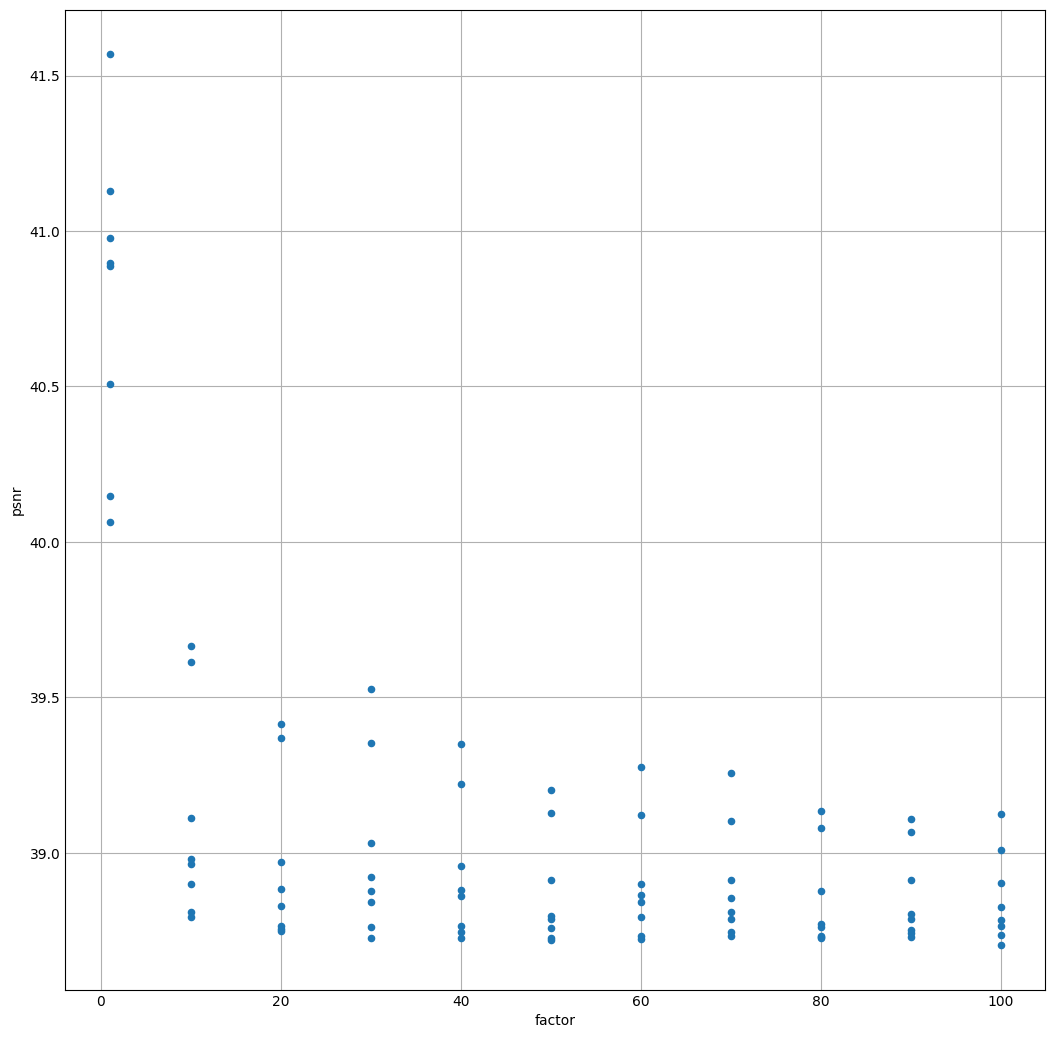

In [10]:
df = pd.read_csv("500x500-with-check.csv", index_col=0)
# print(df.describe())
# print(df["psnr"])
# print(df[df["outsideShape"] == "(10, 10)"])

df_show = df[df["outsideShape"] == "(10, 10)"]

# df_show.plot(kind='scatter',
#         x='factor',
#         y='psnr',
#         figsize=(10, 10))

# plt.show()